In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython import display


def use_svg_display():
    display.set_matplotlib_formats('svg')

In [138]:
# Read JRTs
file = "MU_6_10"
with open(file, "r") as f:
    obta_jrts = f.readline()
    nlip_jrts = f.readline()
    wf_jrts = f.readline()
    ocwf_jrts = f.readline()
    ocwf_acc_jrts = f.readline()

obta_jrts = [int(i) for i in obta_jrts.split(" ")[:-1]]
nlip_jrts = [int(i) for i in nlip_jrts.split(" ")[:-1]]
wf_jrts = [int(i) for i in wf_jrts.split(" ")[:-1]]
ocwf_jrts = [int(i) for i in ocwf_jrts.split(" ")[:-1]]
ocwf_acc_jrts = [int(i) for i in ocwf_acc_jrts.split(" ")[:-1]]

print(obta_jrts)

zipf_para = 2
utilization = 75

global_min = min(min(obta_jrts), min(nlip_jrts), min(wf_jrts), min(ocwf_jrts), min(ocwf_acc_jrts))
global_max = max(max(obta_jrts), max(nlip_jrts), max(wf_jrts), max(ocwf_jrts), max(ocwf_acc_jrts))
print("global min:", global_min, ", global max:", global_max)

[8, 18, 5, 6, 12, 9, 10, 13, 30, 26, 2, 33, 40, 32, 1, 105, 4, 10, 5, 76, 1, 3, 1, 1, 4, 15, 161, 1, 1, 225, 68, 10, 246, 18, 238, 241, 9, 253, 258, 33, 1, 273, 6, 185, 1, 300, 1, 48, 335, 364, 366, 399, 374, 377, 454, 460, 494, 465, 469, 549, 573, 578, 590, 608, 638, 638, 643, 685, 685, 678, 695, 704, 711, 724, 799, 928, 933, 939, 978, 1077, 1011, 1055, 1027, 1047, 1058, 1091, 1082, 1075, 1077, 1074, 1154, 1127, 1145, 1139, 1141, 1156, 1173, 1181, 1182, 1204, 1226, 1218, 1219, 1265, 1269, 1338, 1267, 1330, 1288, 1290, 1343, 1312, 1318, 1353, 1433, 1411, 1426, 1439, 1441, 1440, 1464, 1493, 1632, 1772, 1798, 1915, 1960, 1959, 1957, 1960, 2036, 2020, 2054, 2063, 2147, 2153, 2237, 2245, 2245, 2273, 2285, 2290, 2298, 2308, 2322, 2330, 2374, 2374, 2379, 2508, 2521, 2533, 2583, 2583, 2653, 2629, 2665, 2708, 2704, 2801, 2798, 2798, 2804, 2804, 2804, 2804, 2806, 2830, 2834, 2919, 2937, 2948, 2942, 2976, 2997, 2975, 3022, 3022, 3044, 3079, 3087, 3100, 3121, 3140, 3162, 3179, 3188, 3212, 3189, 3

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_2809/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


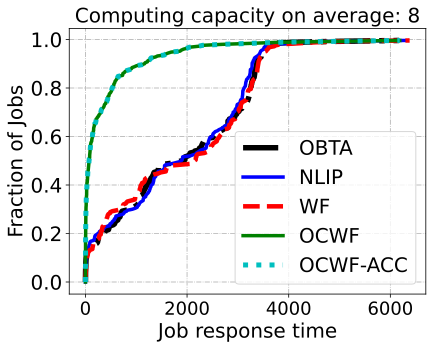

In [139]:
def plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts):
    """
    Plot CDF of average JRTs.
    """
    use_svg_display()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.grid(linestyle='-.')

    ax1.plot(np.sort(obta_jrts), np.linspace(0, 1, len(obta_jrts), endpoint=False), color='k', ls='-.', lw=5.5)
    ax1.plot(np.sort(nlip_jrts), np.linspace(0, 1, len(nlip_jrts), endpoint=False), color='b', ls='-', lw=3.5)
    ax1.plot(np.sort(wf_jrts), np.linspace(0, 1, len(wf_jrts), endpoint=False), color='r', ls='--', lw=4.5)
    ax1.plot(np.sort(ocwf_jrts), np.linspace(0, 1, len(ocwf_jrts), endpoint=False), color='g', ls='-', lw=3.5)
    ax1.plot(np.sort(ocwf_acc_jrts), np.linspace(0, 1, len(ocwf_acc_jrts), endpoint=False), color='c', ls=':', lw=5)
    

    ax1.legend(['OBTA', 'NLIP', 'WF', 'OCWF', 'OCWF-ACC'], fontsize=20)
    ax1.set_ylabel('Fraction of Jobs', fontsize=20)
    ax1.set_xlabel('Job response time', fontsize=20)

    plt.title("Computing capacity on average: {}".format(8), fontsize=20)
    plt.locator_params(axis='x', nbins=7)
    plt.xticks(fontsize=20-2)
    plt.yticks(fontsize=20)

    plt.savefig('MU_6_10.pdf', bbox_inches='tight')
    plt.show()

    
plot_CDF(zipf_para, utilization, obta_jrts, nlip_jrts, wf_jrts, ocwf_jrts, ocwf_acc_jrts)

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_2809/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


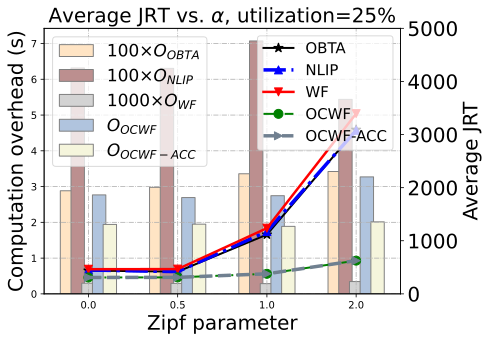

In [93]:
def plot_curve_and_bar(file, fontsize=20):
    """
    THE LHS is the curve figure of avergae JRT. The RHS is the bar figure of computation overhead.
    """
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7])
    x_label = np.array([0, 0.5, 1, 2])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    OCWF = data[3]
    OCWF_ACC = data[4]
    
    OBTA_time = data[5] * 100
    NLIP_time = data[6] * 100
    WF_time = data[7] * 1000
    OCWF_time = data[8]
    OCWF_ACC_time = data[9]

    width = 0.3

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. $\alpha$, utilization=25%", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.set_ylabel('Computation overhead (s)', fontsize=fontsize)
    ax1.bar(x - 1.6 * width, OBTA_time, width, label=r'100$\times O_{OBTA}$', edgecolor='gray', color='bisque')
    ax1.bar(x - 0.8 * width, NLIP_time, width, label=r'100$\times O_{NLIP}$', edgecolor='gray', color='rosybrown')
    ax1.bar(x, WF_time, width, label=r'1000$\times O_{WF}$', edgecolor='gray', color='lightgrey')
    ax1.bar(x + 0.8 * width, OCWF_time, width, label=r'$O_{OCWF}$', edgecolor='gray', color='lightsteelblue')
    ax1.bar(x + 1.6 * width, OCWF_ACC_time, width, label=r'$O_{OCWF-ACC}$', edgecolor='gray', color='beige')
    ax1.set_xlabel('Zipf parameter', fontsize=fontsize)
    
    ax2 = ax1.twinx()
    ax2.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=10, label='OBTA')
    ax2.plot(x, NLIP, color='b', ls='-.', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax2.plot(x, WF, color='r', ls='-', linewidth=2.5, marker='v', ms=8, label='WF')
    ax2.plot(x, OCWF, color='g', ls='-.', linewidth=2, marker='o', ms=9, label='OCWF')
    ax2.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Computation overhead (s)', fontsize=fontsize)
    ax2.set_ylabel('Average JRT', fontsize=fontsize)
    ax2.set_xlabel('Zipf parameter', fontsize=fontsize)
    ax2.set_xticks(x, labels=x_label, fontsize=fontsize)
    plt.ylim([0, 5000])
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper left', fancybox=True, framealpha=0.75)
    ax2.legend(fontsize=fontsize-5, loc='upper right', fancybox=True, framealpha=0.75)
    
    plt.savefig("u25.pdf", bbox_inches='tight')
    plt.show()

    
plot_curve_and_bar("res_u0.25")

/var/folders/3w/gjf7c0c935zdrmdc1y_knxyw0000gn/T/ipykernel_2809/2652794101.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


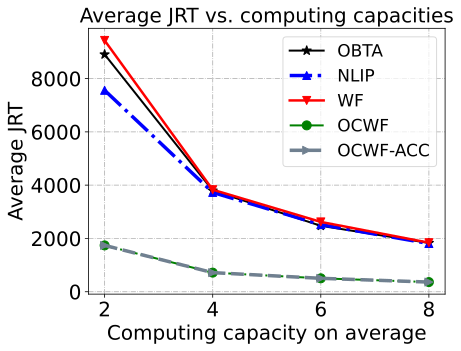

In [141]:
def plot_curve(file, fontsize=20):
    use_svg_display()
    
    data = np.loadtxt(file, delimiter=' ')

    x = np.array([1, 3, 5, 7])
    x_label = np.array([2, 4, 6, 8])

    OBTA = data[0]
    NLIP = data[1]
    WF = data[2]
    OCWF = data[3]
    OCWF_ACC = data[4]

    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    ax1.set_title(r"Average JRT vs. computing capacities", fontsize=fontsize)
    ax1.grid(linestyle='-.')
    
    ax1.plot(x, OBTA, color='k', ls='-', linewidth=2, marker='*', ms=10, label='OBTA')
    ax1.plot(x, NLIP, color='b', ls='-.', linewidth=3.5, marker='^', ms=8, label='NLIP')
    ax1.plot(x, WF, color='r', ls='-', linewidth=2.5, marker='v', ms=8, label='WF')
    ax1.plot(x, OCWF, color='g', ls='-.', linewidth=2, marker='o', ms=9, label='OCWF')
    ax1.plot(x, OCWF_ACC, color='slategray', ls='--', linewidth=3.5, marker='>', ms=8, label='OCWF-ACC')
    ax1.set_ylabel('Average JRT', fontsize=fontsize)
    ax1.set_xlabel("Computing capacity on average", fontsize=fontsize)
    ax1.set_xticks(x, labels=x_label, fontsize=fontsize)
    
    plt.yticks(fontsize=fontsize)
    
    ax1.legend(fontsize=fontsize-3, loc='upper right', fancybox=True, framealpha=0.75)
    
    plt.savefig("cap.pdf", bbox_inches='tight')
    plt.show()

    
plot_curve("res_cap")